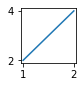

In [1]:
# For some reason this seems to be necessary in anaconda to stop matplotlib crashing
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(1,1))
plt.plot([1,2],[2,4])
plt.show()

In [2]:
# Now import everything else
import numpy as np
import pylab
import time


# Camera Object

In [4]:
# Make a camera object
#from CamFLIR import CamFLIR
from CamHam import CamHam
cam=CamHam()

In [5]:
#This is how you take a photo
img=cam.Snap(1)

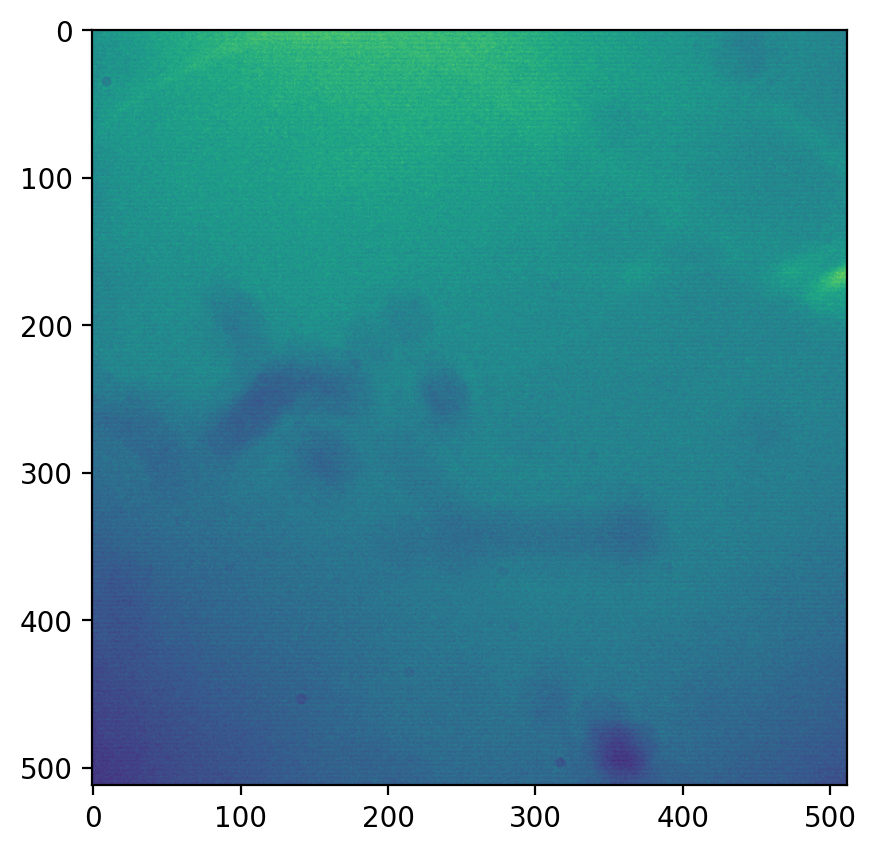

In [6]:
#and plot it
plt.figure(figsize=(5,5),dpi=200)
pylab.imshow(img[0],clim=(2000,2800))

# Stage Object

In [3]:
#Initiate a stage object
from Stage import Stage
stg=Stage()

In [4]:
#Move in X and into focus
stg.MoveToX(0.0)
stg.MoveToZ(3.4)

#Query position
print("Stage at ",stg.X,stg.Y,stg.Z)

Stage at  0.0 0 3.4


# Scan Example

In [7]:
def MakeImageSweep(Zs,showthem=True):
    
    # Put the images in this array
    pics=[]
    
    for i in range(0,len(Zs)):
        
        # Move stage
        stg.MoveToZ(Zs[i])
        
        #Snap a pic
        pics.append(cam.Snap(1)[0])
        
        time.sleep(1)

    return pics

In [8]:
Zs=np.linspace(3.408,3.412,20)
pics=MakeImageSweep(Zs,showthem=True)

In [ ]:
for i in range(0,len(pics)):
    #Optionally display them
    plt.figure(figsize=(5,5))
    plt.imshow(pics[i])
    plt.title(Zs[i])
    plt.clim(2000,2800)

In [ ]:
Integrals=[sum(sum(p)) for p in pics]
plt.figure(figsize=(5,5),dpi=150)
plt.xlabel("Z pos (mm)")
plt.ylabel("Intensity (arb)")
plt.plot(Zs,Integrals)

In [ ]:
stg.__X_Axis

In [ ]:
xaxis=stg.GetAxes()[0]

In [ ]:
xaxis.MOV(xaxis.axes,0.1)

In [ ]:
xaxis.REF?

In [4]:
time.sleep?